# Get the data

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-07-11 17:53:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  69.5MB/s    in 1.5s    

2022-07-11 17:53:40 (69.5 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with it) visualize visualize !

In [3]:
!ls pizza_steak

test/  train/


In [7]:
!ls pizza_steak/train/

pizza/ steak/


In [9]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg   618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg   61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  168

In [18]:
import os
for dirpath,dirnames,filename in os.walk('./pizza_steak/'):
    print(f"There are {len(dirnames)} and {len(filename)} in {dirpath}")

There are 2 and 1 in ./pizza_steak/
There are 2 and 1 in ./pizza_steak/test
There are 0 and 250 in ./pizza_steak/test/steak
There are 0 and 250 in ./pizza_steak/test/pizza
There are 2 and 1 in ./pizza_steak/train
There are 0 and 750 in ./pizza_steak/train/steak
There are 0 and 750 in ./pizza_steak/train/pizza


## Get the class names

In [3]:
import numpy as np
import pathlib

data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

## visualize our imgs

In [74]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_img(target_dir,target_class):
    # form the right path
    path = pathlib.Path(f'pizza_steak/{target_dir}/{target_class}')
    dirlist = os.listdir(path)

    # draw a ramdom index number of the dirlist (formed an arry of imgs)
    lucky_index = random.randint(0,len(dirlist))
    lucky_img = dirlist[lucky_index]


    img = mpimg.imread(f'pizza_steak/{target_dir}/{target_class}/{lucky_img}')
    plt.imshow(img)
    plt.title(f'{target_class} \n Img file name:{lucky_img}')
    plt.axis("off")
    print(f'Img shape {img.shape}')
    return img

Img shape (384, 512, 3)


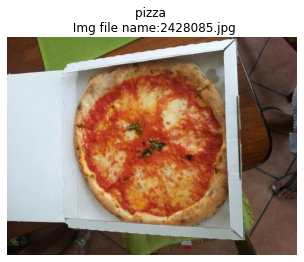

In [104]:
img = view_random_img('train','pizza')

In [108]:
img.shape # returns width height color channels

(384, 512, 3)

# End to end example

follow this cnn explaniner https://poloclub.github.io/cnn-explainer/

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocessing data make all the pixel between 1 to 0
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup path to our data dir
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"


#import data from dir turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

# build a CNN model
model_1 =tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-12 00:53:33.858165: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-12 00:53:33.858729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


why creating batches ? <br>
Since our computer can not handle all the things into one batch <br>
Also it is due to we dont have larger GPU memory size to Fit

In [2]:
len(train_data) # there are 47 batches 

47

In [3]:
1500 / 32 # 32 is the batch size of a batch

46.875

In [4]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
hist_1 = model_1.fit(train_data,epochs=10, steps_per_epoch=len(train_data),validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/10


2022-07-12 00:53:39.531828: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-12 00:53:39.878306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.5584 - accuracy: 0.7060

2022-07-12 00:53:43.947386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 6s 106ms/step - loss: 0.5584 - accuracy: 0.7060 - val_loss: 0.5182 - val_accuracy: 0.7140
Epoch 2/10
47/47 [==============================] - 4s 87ms/step - loss: 0.4264 - accuracy: 0.8053 - val_loss: 0.3192 - val_accuracy: 0.8700
Epoch 3/10
47/47 [==============================] - 4s 85ms/step - loss: 0.4163 - accuracy: 0.8080 - val_loss: 0.3647 - val_accuracy: 0.8380
Epoch 4/10
47/47 [==============================] - 4s 85ms/step - loss: 0.3680 - accuracy: 0.8367 - val_loss: 0.3048 - val_accuracy: 0.8680
Epoch 5/10
47/47 [==============================] - 4s 85ms/step - loss: 0.3309 - accuracy: 0.8627 - val_loss: 0.2817 - val_accuracy: 0.8840
Epoch 6/10
47/47 [==============================] - 4s 85ms/step - loss: 0.2903 - accuracy: 0.8800 - val_loss: 0.3080 - val_accuracy: 0.8620
Epoch 7/10
47/47 [==============================] - 4s 84ms/step - loss: 0.2640 - accuracy: 0.9053 - val_loss: 0.3021 - val_accuracy: 0.8560
Epoch 8/10
47/47 [=====

In [7]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
